# **<center>Machine Learning and Finance </center>**


## <center> Programming Session 5 - Introduction to Deep Learning </center>

<table class="tfo-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="https://mlfbg.github.io/MachineLearningInFinance/">
    <img src="https://drive.google.com/uc?export=view&id=1gmxxmwCR1WXK0IYtNqvE4QXFleznWqQO" height="50"/>
    Course page</a>
</td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1XmBBmaAzcbx2d_4yntG2Mn3adxtCt5B9?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" height="50" />Run in Google Colab</a>
  </td>
</table>

In [ ]:
# Access files from Google Drive
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Import Basic Modules
import tensorflow as tf # to create neural networks
import numpy as np # to manipulate arrays
import matplotlib.pyplot as plt # for plots 
plt.style.use('dark_background') # to adapt the colors to a dark background
from IPython.display import Image # for showing graphs from the lectures

The objective of this session is to use a neural network for a sentiment analysis task on the Imdb dataset.

In this example, we will learn to classify movie reviews as positive or negative, based on the text content of the reviews.



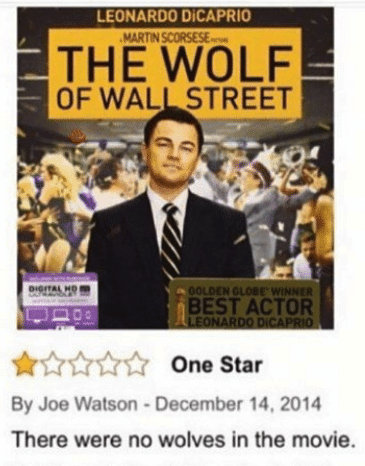

In [ ]:
from IPython.display import Image # for showing graphs from the lectures
Image(filename='./gdrive/My Drive/Colab Notebooks/Programming_Session_5/images/review_example.png',  width=300) 

# 1. Exploring the dataset

## 1.1 Preprocessing the data

* As preprocessing text data is not the objective of today's programming session (See Lecture 6), we will use preprocessed reviews. 

* Each review is a sequence of words. The preprocessing of these sequences is done using a dictionary called **word2idx** which maps each word to an integer.  

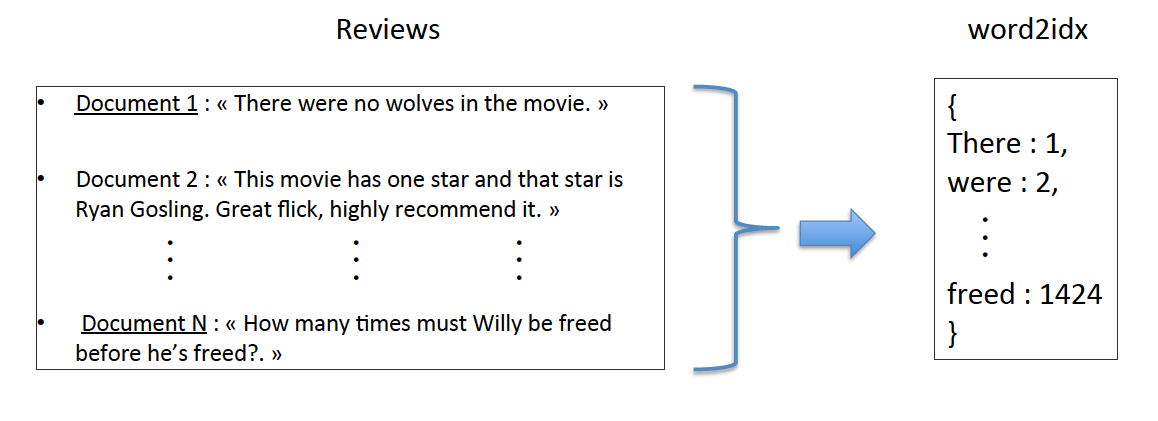

In [ ]:
Image(filename='./gdrive/My Drive/Colab Notebooks/Programming_Session_5/images/word2idx.png',  width=700) 

* In our example, words are indexed by overall frequency in the dataset, so that for instance the integer "4" encodes the 4th most frequent word in the data.

* We end up with preprocessed reviews, which are **list of integers**, as shown in the following figure

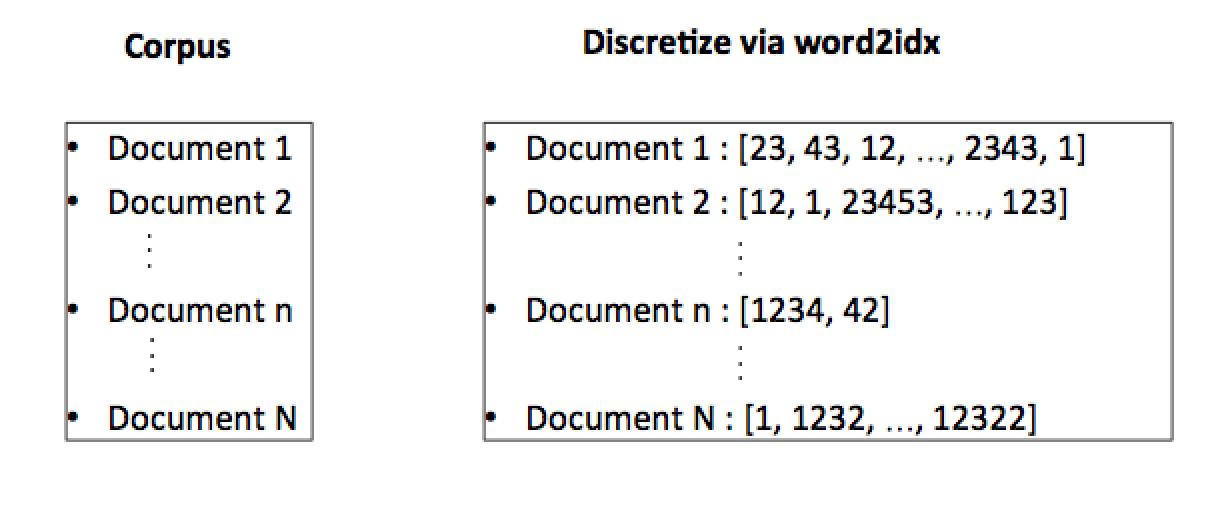

In [ ]:
Image(filename='./gdrive/My Drive/Colab Notebooks/Programming_Session_5/images/corpus.png',  width=700) 

Let `V = 10000` be the vocabulary size (i.e, the number of words you want to process). The other words are all going to be considered as "unknown" (also called "out of vocabulary") with the same index. 

In [ ]:
V = 10000

Q1. Load the dataset named `imdb` from `tensorflow.keras.datasets`. (More information [here](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/load_data)). 

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_targets), (test_data, test_targets) = imdb.load_data(path='imdb.npz', 
                                                      num_words=V, # Number of words kept in the dataset (vocabulary size) 
                                                      maxlen=1000, # Maximim sequence length (the rest is truncated)
                                                      start_char=1, # index of start of sequence (<sos>)
                                                      oov_char=2, # index for unknow word (oov : out of vocabulary)
                                                      index_from=3) # first index of actual words (as 0 is for padding, 1 for <sos> and 2 for oov)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Q2. Show the first training data as a list of integers (or 1D array)

In [ ]:
np.array(train_data[0])

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

Q3. Get the `word2idx` dictionary using `imdb.get_word_index()`. What is the index of the word "great" ? 

In [ ]:
word2idx = imdb.get_word_index()

In [ ]:
word2idx["great"]

84

Q3. Create a dictionary called `idx2word` to reverse the dictionary `word2idx`. Deduce the original review corresponding to the first training data (as a sequence of words and not a sequence of integers). Note that the indexes are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”

In [ ]:
idx2word = {v:k for k,v in word2idx.items()} # to reverse the dictionary word2idx
first_review = ' '.join([idx2word.get(index - 3, 'oov') for index in train_data[0]]) # non existing indexes give "unknown" 
first_review

"oov this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert oov is an amazing actor and now the same being director oov father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for oov and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also oov to the two little boy's that played the oov of norman and paul they were just brilliant children are often left out of the oov list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have don

## 1.2 Creating the (N, V) tensor of Data 

The data is a list of lists.

Q4. What is the maximum length of the training sequences ? 

In [ ]:
len(train_data[1])

189

(array([ 3391., 11482.,  4423.,  2322.,  1323.,   774.,   478.,   310.,
          205.,   167.]),
 array([ 11. , 109.8, 208.6, 307.4, 406.2, 505. , 603.8, 702.6, 801.4,
        900.2, 999. ]),
 <a list of 10 Patch objects>)

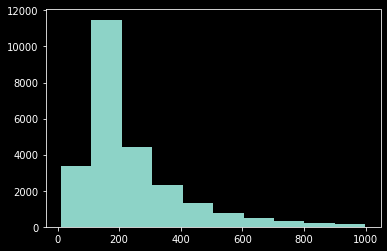

In [ ]:
plt.hist([len(sequence) for sequence in train_data])

In [ ]:
max([len(sequence) for sequence in train_data])

999

Q5. Create a function named `vectorize` that takes as input:

* sequences: a list of list of integers. 
* V : The vocabulary size.  

The function will output a tensor of shape (N, V), N being the length of the sequences, such that: 

* Each sequence is represented by a row in the (N, V) tensor. 
* For each sequence, the corresponding row is a V-dimensional vector where all the components are 0 except for the indices appearing in the sequence. For instance the sequence [12, 564] will be represented by a V-dim vector with zeros everywhere except for indices 12 and 564. 

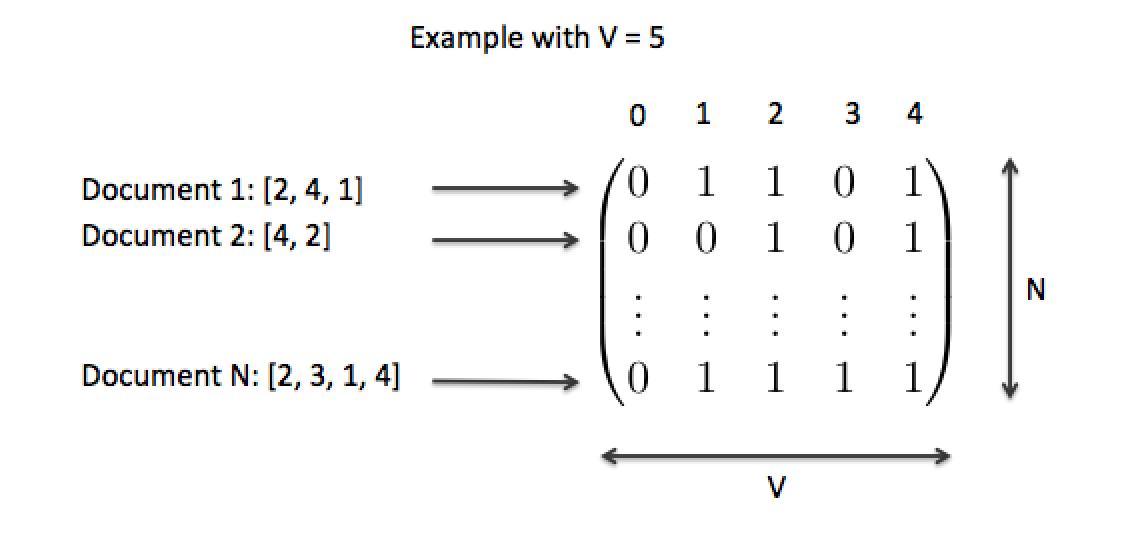

In [ ]:
Image(filename='./gdrive/My Drive/Colab Notebooks/Programming_Session_5/images/vectorize.png',  width=700) 

In [ ]:
def vectorize(sequences, V):
  # length of sequences
  N = len(sequences)
  # Initialize the tensor data of shape (N, V) with zeros
  tensor_data = np.zeros((N, V))
  # Add the ones in the tensor data
  for i, sequence in enumerate(sequences):
    tensor_data[i, sequence] = 1.
  return tensor_data

Q6. Vectorize the training data and the test data.

In [ ]:
# Train tensor
X_train = vectorize(train_data, V)

# Test tensor
X_test = vectorize(test_data, V)

In [ ]:
X_train.shape

(25000, 10000)

In [ ]:
X_test.shape

(24819, 10000)

Q7. Turn the labels into float numbers

In [ ]:
y_train = np.asarray(train_targets).astype('float32')
y_test = np.asarray(test_targets).astype('float32')

In [ ]:
y_train.shape

(25000,)

In [ ]:
y_test.shape

(24819,)

# 2. Sentiment Analysis

## 2.2 Building the Model

Q8. Our task is a binary classification task. What is the most suitable loss function ? What should be the last activation function ?  

The loss function is the binary classification loss function. The last layer should have a **sigmoid** activation function. 


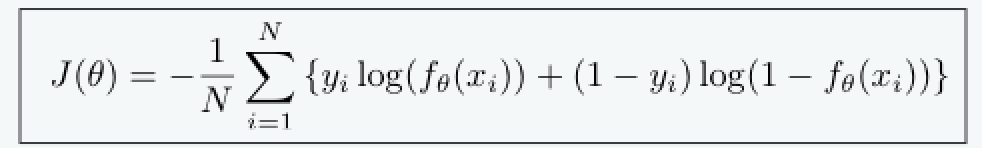

In [ ]:
Image(filename='./gdrive/My Drive/Colab Notebooks/Programming_Session_5/images/loss.png',  width=700) 

Q9. Using `Sequential` from tensorflow.keras as explained in this [link](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential), Create the following model. 

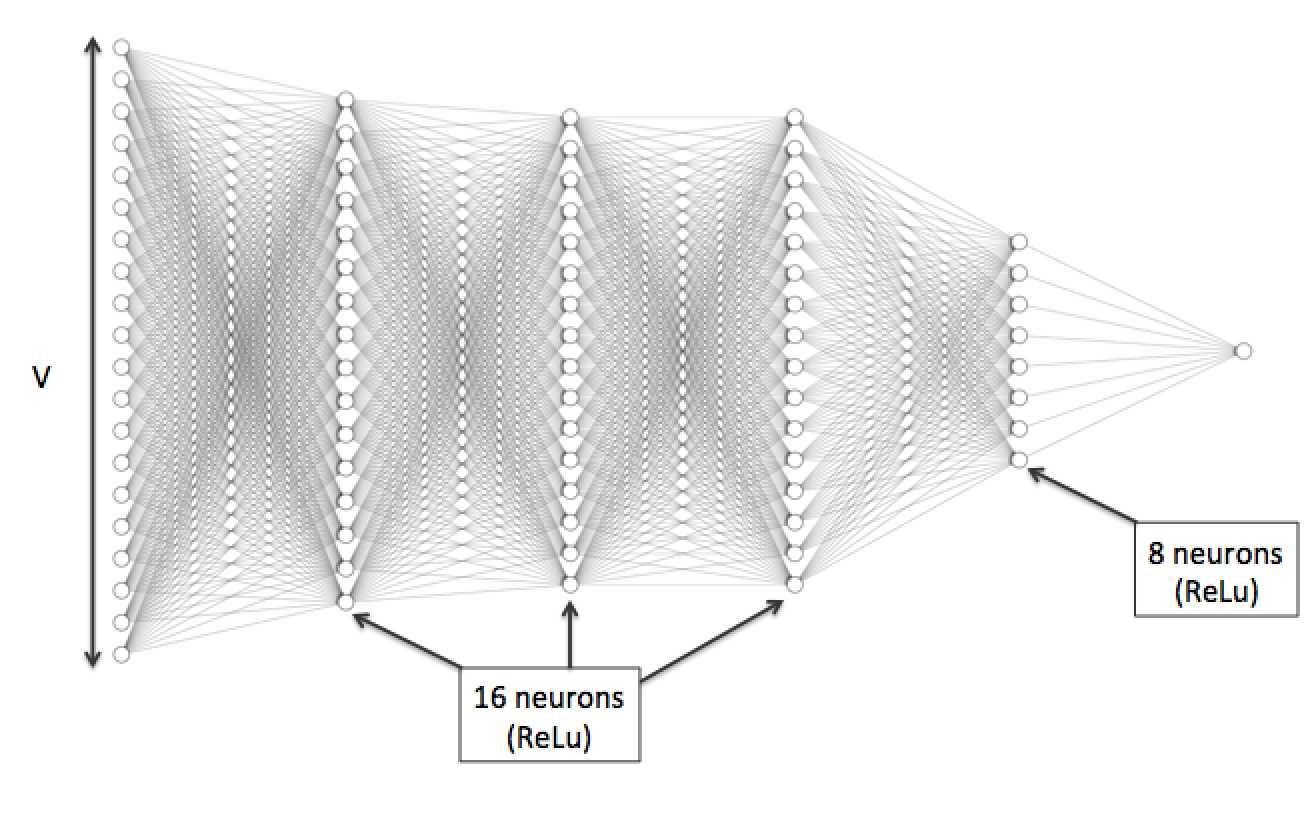

In [ ]:
Image(filename='./gdrive/My Drive/Colab Notebooks/Programming_Session_5/images/big_architecture.png',  width=700) 

In [ ]:
from tensorflow.keras.models import Sequential # to define a stack of layers
from tensorflow.keras.layers import Dense # The dense layer

model = Sequential()
model.add(Dense(16, activation = "relu", input_shape=(V,))) # Add a Dense layer with 16 neurons and relu activation function
model.add(Dense(16, activation = "relu")) # Add a Dense layer with 16 neurons and relu activation function
model.add(Dense(16, activation = "relu")) # Add a Dense layer with 16 neurons and relu activation function
model.add(Dense(8, activation = "relu")) # Add a Dense layer with 8 neurons and rel
model.add(Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 160,705
Trainable params: 160,705
Non-trainable params: 0
_________________________________________________________________


Q10. Fit the model to the training data using **Stochastic Gradient Descent**

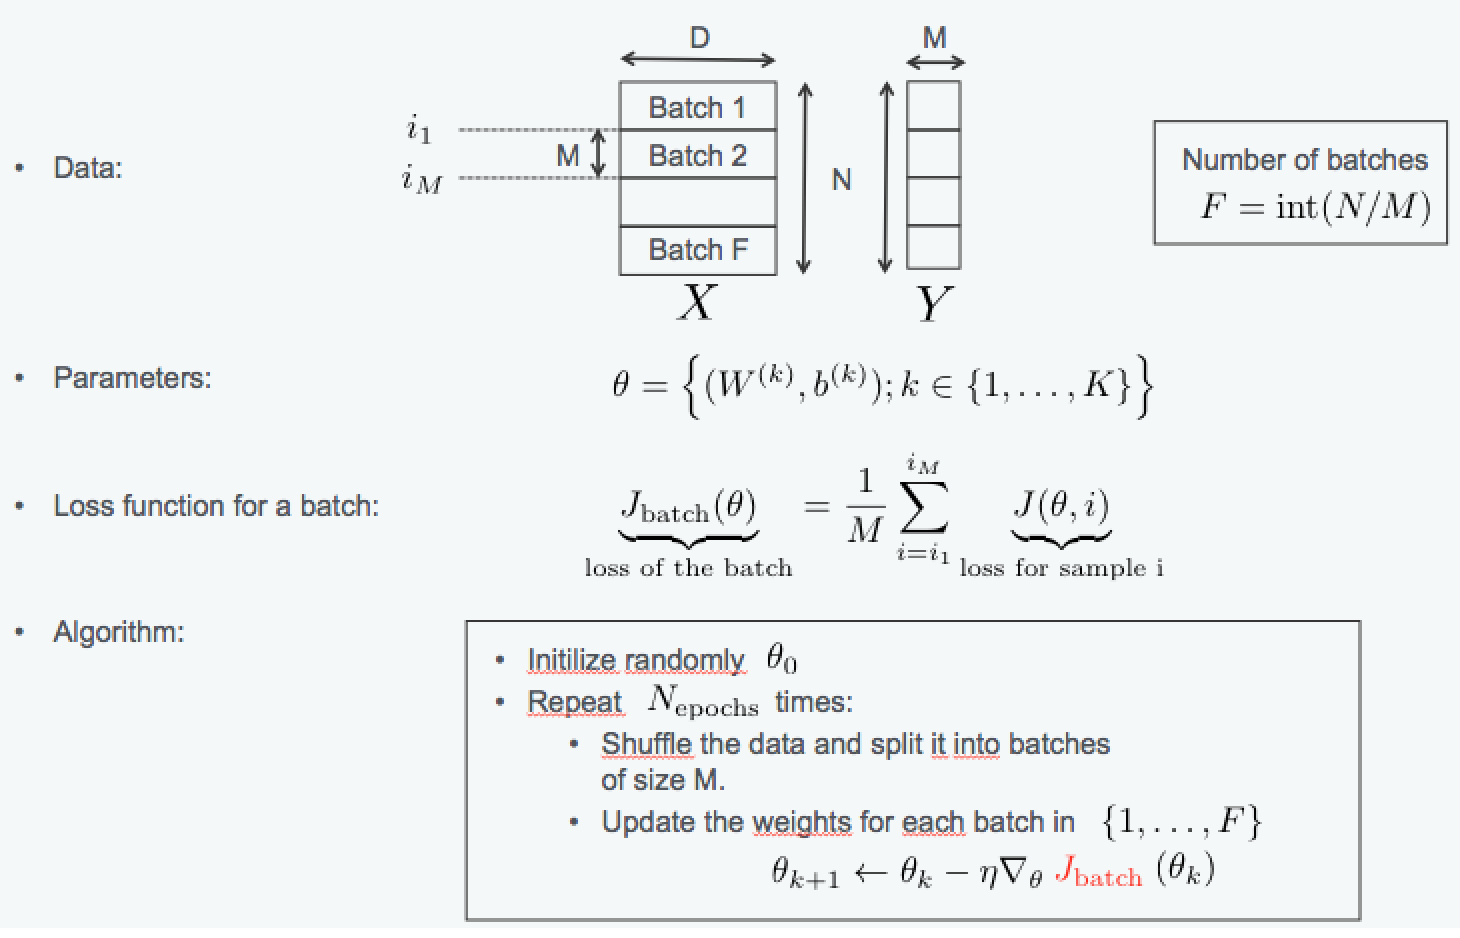

In [ ]:
Image(filename='./gdrive/My Drive/Colab Notebooks/Programming_Session_5/images/SGD.png',  width=700) 

In [ ]:
N_epochs = 20 # Number of epochs
M = 64 # batch size 

In [ ]:
model.compile(optimizer = 'sgd', # optimizer Stochastic Gradient Descent
              loss = 'binary_crossentropy', # loss function 
              metrics = ["acc"]) # accuracy as the evaluation metric

In [ ]:
history = model.fit(X_train, y_train, # training data
                    epochs = N_epochs, # number of epochs
                    batch_size = M, # batch size 
                    validation_split = 0.3) # 70% train 30% validation 

Epoch 1/20
274/274 [==============================] - 2s 8ms/step - loss: 0.6912 - acc: 0.5206 - val_loss: 0.6875 - val_acc: 0.5457
Epoch 2/20
274/274 [==============================] - 2s 8ms/step - loss: 0.6636 - acc: 0.6483 - val_loss: 0.6276 - val_acc: 0.7273
Epoch 3/20
274/274 [==============================] - 2s 7ms/step - loss: 0.5621 - acc: 0.7806 - val_loss: 0.5091 - val_acc: 0.8243
Epoch 4/20
274/274 [==============================] - 2s 7ms/step - loss: 0.4228 - acc: 0.8482 - val_loss: 0.3747 - val_acc: 0.8508
Epoch 5/20
274/274 [==============================] - 2s 7ms/step - loss: 0.3239 - acc: 0.8745 - val_loss: 0.3160 - val_acc: 0.8676
Epoch 6/20
274/274 [==============================] - 2s 7ms/step - loss: 0.2804 - acc: 0.8873 - val_loss: 0.3521 - val_acc: 0.8532
Epoch 7/20
274/274 [==============================] - 2s 7ms/step - loss: 0.2481 - acc: 0.9021 - val_loss: 0.2984 - val_acc: 0.8764
Epoch 8/20
274/274 [==============================] - 2s 7ms/step - loss: 0.

Q11. Plot the losses and accuracies for the training and the validation data. 

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

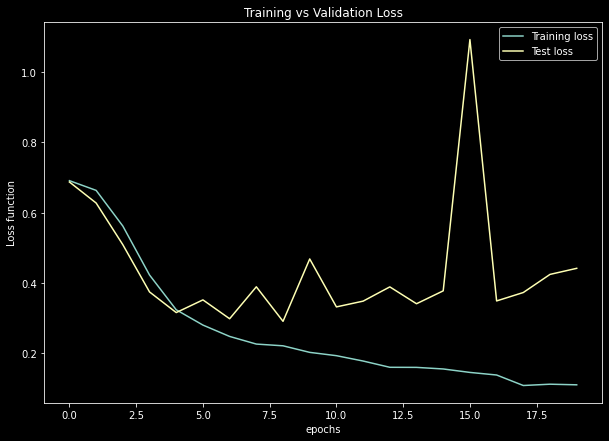

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(history.history["loss"], label = "Training loss")
plt.plot(history.history["val_loss"], label = "Test loss")
plt.xlabel("epochs")
plt.ylabel("Loss function")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

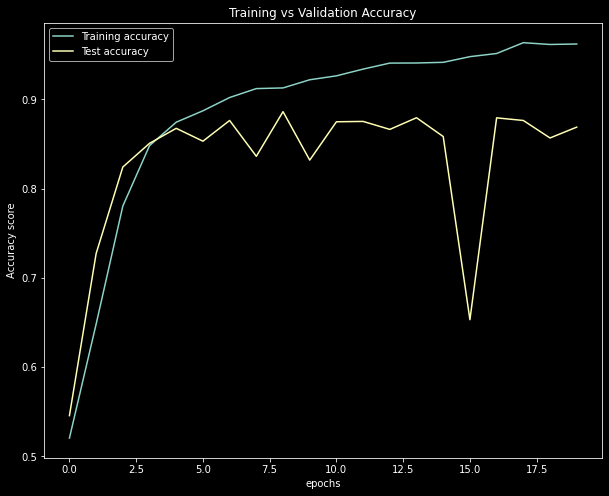

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(range(N_epochs), history.history["acc"], label = "Training accuracy")
plt.plot(range(N_epochs), history.history["val_acc"], label = "Test accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy score")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

Q12. What problem can we conlude from the previous plots? 

The validation loss starts increasing after 5 epochs, we have an **overfitting** problem. 

## 2.2 Fighting the Overfitting problem

To reduce the overfitting. Let's start by decreasing the complexity of the model. 

Q13. Create the following model and train it. (Set the Dropout rate to 0.2). 

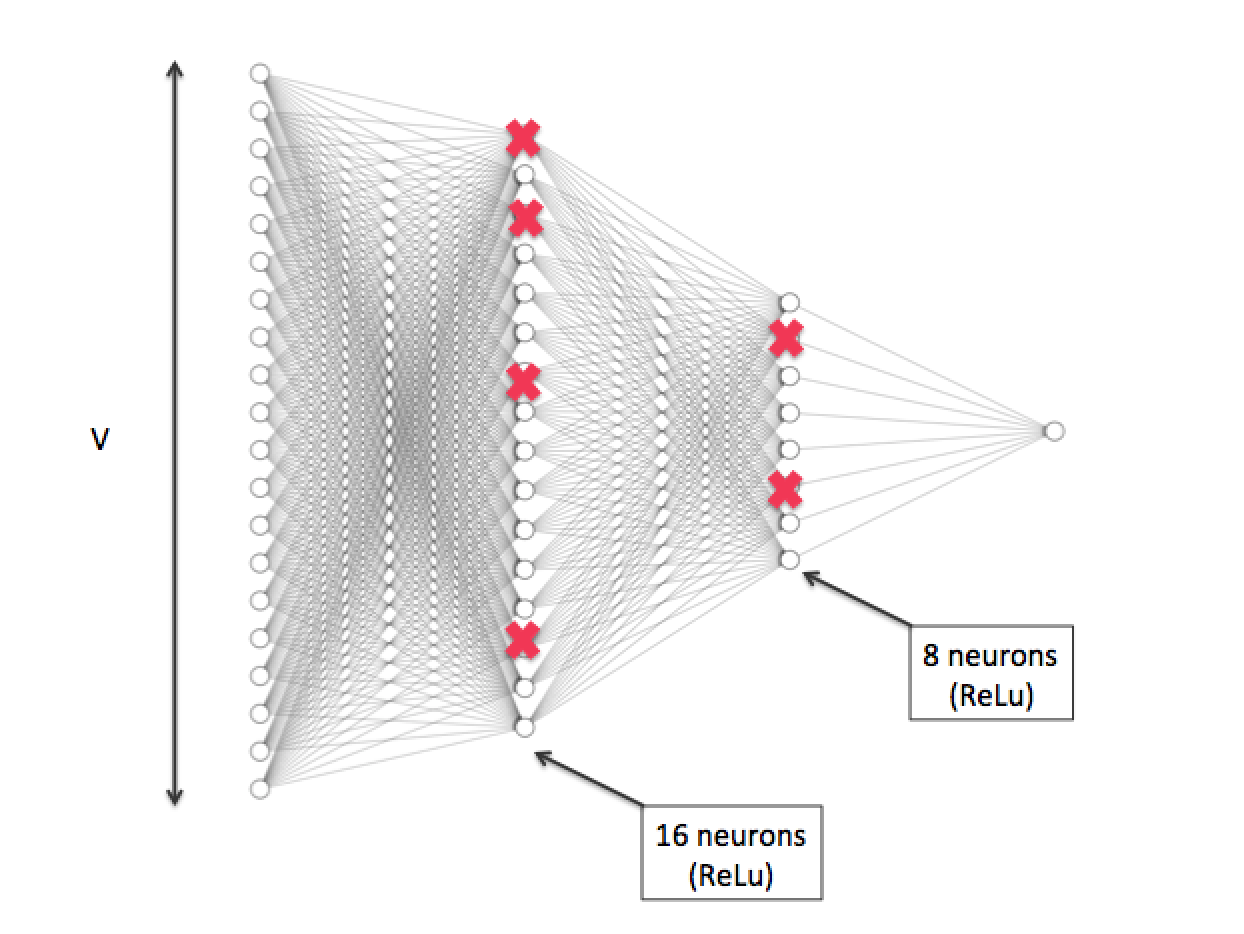

In [ ]:
Image(filename='./gdrive/My Drive/Colab Notebooks/Programming_Session_5/images/architecture.png',  width=700) 

In [ ]:
from tensorflow.keras.models import Sequential # to define a stack of layers
from tensorflow.keras.layers import Dense, Dropout # The dense and dropout layers

model = Sequential()
model.add(Dense(16, activation = "relu", input_shape=(V,))) # Add a Dense layer with 16 neurons and relu activation function
model.add(Dropout(0.2))
model.add(Dense(8, activation = "relu")) # Add a Dense layer with 8 neurons and rel
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                160016    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 160,161
Trainable params: 160,161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'sgd', # optimizer Stochastic Gradient Descent
              loss = 'binary_crossentropy', # loss function 
              metrics = ["acc"]) # accuracy as the evaluation metric

In [ ]:
history = model.fit(X_train, y_train,
                    epochs = N_epochs,
                    batch_size = M,
                    validation_split = 0.3)

Epoch 1/20
274/274 [==============================] - 2s 7ms/step - loss: 0.6760 - acc: 0.5875 - val_loss: 0.6333 - val_acc: 0.7348
Epoch 2/20
274/274 [==============================] - 2s 7ms/step - loss: 0.5947 - acc: 0.7114 - val_loss: 0.5226 - val_acc: 0.8120
Epoch 3/20
274/274 [==============================] - 2s 7ms/step - loss: 0.5100 - acc: 0.7687 - val_loss: 0.4384 - val_acc: 0.8384
Epoch 4/20
274/274 [==============================] - 2s 7ms/step - loss: 0.4493 - acc: 0.8035 - val_loss: 0.3881 - val_acc: 0.8503
Epoch 5/20
274/274 [==============================] - 2s 7ms/step - loss: 0.4057 - acc: 0.8255 - val_loss: 0.3567 - val_acc: 0.8592
Epoch 6/20
274/274 [==============================] - 2s 7ms/step - loss: 0.3783 - acc: 0.8356 - val_loss: 0.3341 - val_acc: 0.8659
Epoch 7/20
274/274 [==============================] - 2s 7ms/step - loss: 0.3521 - acc: 0.8471 - val_loss: 0.3225 - val_acc: 0.8703
Epoch 8/20
274/274 [==============================] - 2s 7ms/step - loss: 0.

Q14. Plot the losses and accuracies for the training and the validation data. 

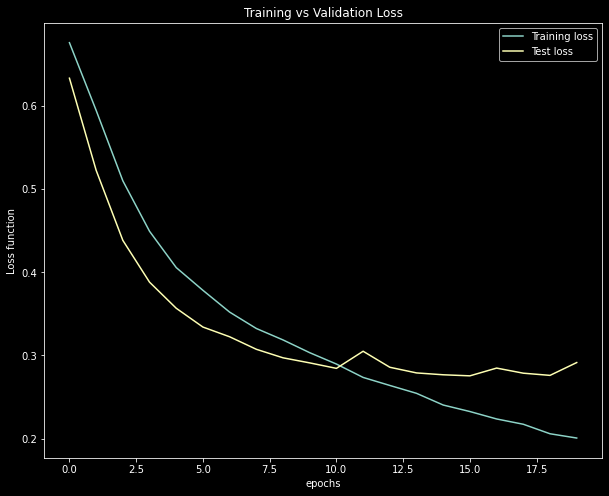

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(history.history["loss"], label = "Training loss")
plt.plot(history.history["val_loss"], label = "Test loss")
plt.xlabel("epochs")
plt.ylabel("Loss function")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

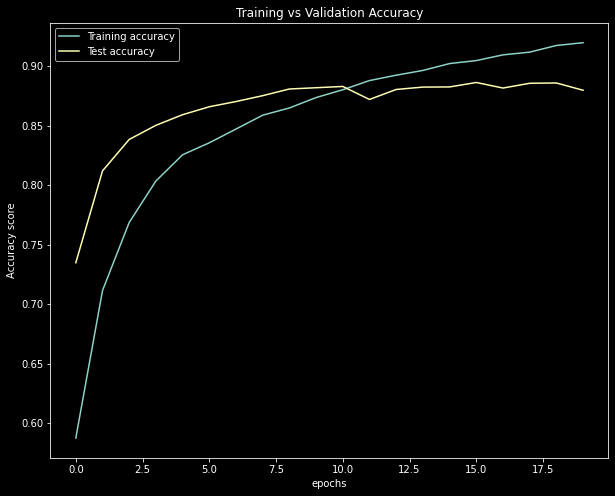

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(range(N_epochs), history.history["acc"], label = "Training accuracy")
plt.plot(range(N_epochs), history.history["val_acc"], label = "Test accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy score")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

Q15. Evaluate your final model on the test data

In [ ]:
model.evaluate(X_test, y_test)

776/776 [==============================] - 1s 2ms/step - loss: 0.3090 - acc: 0.8733


[0.3089908957481384, 0.8733228445053101]

# Summary




In this lecture we learned:

* How to preprocess sequences of word reviews. 
* How to create a stack of fully connected layers for a binary classification task. 
* How to train the model using Stochastic Gradient Descent
* How to find the optimal complexity of a neural network in order to keep the balance between **Optimization** and **Generalization**


How to improve the model ? 
* By playing with the hyperparameters and the regularization techniques. 
* By finding a better way of encoding the words (See Lecture 6)
* By using Sequential Models which take into consideration the sequential nature of the data (See Lecture 4 and 7)